In [2]:
##########################################################
#  Python script template for Question 2 (IAML Level 11)
#  Note that
#  - You should not change the filename of this file, 'iaml01cw2_q2.py', which is the file name you should use when you submit your code for this question.
#  - You should write code for the functions defined below. Do not change their names.
#  - You can define function arguments (parameters) and returns (attributes) if necessary.
#  - In case you define helper functions, do not define them here, but put them in a separate Python module file, "iaml01cw2_my_helpers.py", and import it in this script.
#  - For those questions requiring you to show results in tables, your code does not need to present them in tables - just showing them with print() is fine.
#  - You do not need to include this header in your submission.
##########################################################

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from iaml01cw2_helpers import *
from iaml01cw2_my_helpers import *
from sklearn.linear_model import LogisticRegression

# Data Normalization

<b>Step1</b>: Make a back up of Xtrn and Xtst by copying Xtrn to Xtrn_orig and Xtst to Xtst_orig.


In [4]:
# step1: load data
Xtrn, Ytrn, Xtst, Ytst = load_FashionMNIST('../q1_data')
Xtrn_orig, Ytrn, Xtst_orig, Ytst = load_FashionMNIST('../q1_data')

# step2: Divide by 255
xtrn=np.divide(Xtrn,255)
xtst=np.divide(Xtst,255)

# Step3: Step 3 Calculate the mean value of Xtrn for each dimension 
Xmean=np.mean(xtrn, axis=0)
Xmean.shape

# Step 4 Subtract Xmean from each row of Xtrn and Xtst
Xtrn_nm = xtrn-Xmean
Xtst_nm = xtst-Xmean

# report data
print(Xtrn_nm[0,:4])
print(Xtrn_nm[-1,:4])

[-3.13725490e-06 -2.26797386e-05 -1.17973856e-04 -4.07058824e-04]
[-3.13725490e-06 -2.26797386e-05 -1.17973856e-04 -4.07058824e-04]


<br>
<b>2.1 (3 points)</b>
Carry out a classification experiment with multinomial logistic regression, and report the classification accuracy and confusion matrix (in numbers rather than in graphical representation such as heatmap) for the test set.
You should use sklearn.linear_model_LogisticRegression() with the default parameters. Make sure that you use Xtrn_nm for training and Xtst_nm for testing.

In [8]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(Xtrn_nm,Ytrn)

# get score
print(lr.score(Xtst_nm,Ytst))

# get confusion matrix
y_preds = lr.predict(Xtst_nm)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytst,y_preds))


0.8401
[[819   3  15  50   7   4  89   1  12   0]
 [  5 953   4  27   5   0   3   1   2   0]
 [ 27   4 731  11 133   0  82   2   9   1]
 [ 31  15  14 866  33   0  37   0   4   0]
 [  0   3 115  38 760   2  72   0  10   0]
 [  2   0   0   1   0 911   0  56  10  20]
 [147   3 128  46 108   0 539   0  28   1]
 [  0   0   0   0   0  32   0 936   1  31]
 [  7   1   6  11   3   7  15   5 945   0]
 [  0   0   0   1   0  15   1  42   0 941]]


In [13]:
lr.score(Xtst_nm,Ytst)

0.8401

In [14]:
y_preds = lr.predict(Xtst_nm)

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Ytst,y_preds)

array([[819,   3,  15,  50,   7,   4,  89,   1,  12,   0],
       [  5, 953,   4,  27,   5,   0,   3,   1,   2,   0],
       [ 27,   4, 731,  11, 133,   0,  82,   2,   9,   1],
       [ 31,  15,  14, 866,  33,   0,  37,   0,   4,   0],
       [  0,   3, 115,  38, 760,   2,  72,   0,  10,   0],
       [  2,   0,   0,   1,   0, 911,   0,  56,  10,  20],
       [147,   3, 128,  46, 108,   0, 539,   0,  28,   1],
       [  0,   0,   0,   0,   0,  32,   0, 936,   1,  31],
       [  7,   1,   6,  11,   3,   7,  15,   5, 945,   0],
       [  0,   0,   0,   1,   0,  15,   1,  42,   0, 941]])

<br>
<b>2.2 (3 points)</b><br>
Carry out a classification experiment with SVM classifiers, and report the mean accuracy and confusion matrix (in numbers) for the test set.
You should use sklearn.svm.SVC() with the default parameters (kernel=’rbf’, C = 1.0, gamma=’auto’).

In [6]:
from sklearn.svm import SVC

In [7]:
svc_rbf = SVC()
svc_rbf.fit(Xtrn_nm, Ytrn) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
svc_rbf.score(Xtst_nm,Ytst)

0.8461

In [35]:
ysvc_preds = svc_rbf.predict(Xtst_nm)
confusion_matrix(Ytst,ysvc_preds)

array([[845,   2,   8,  51,   4,   4,  72,   0,  14,   0],
       [  4, 951,   7,  31,   5,   0,   1,   0,   1,   0],
       [ 15,   2, 748,  11, 137,   0,  79,   0,   8,   0],
       [ 32,   6,  12, 881,  26,   0,  40,   0,   3,   0],
       [  1,   0,  98,  36, 775,   0,  86,   0,   4,   0],
       [  0,   0,   0,   1,   0, 914,   0,  57,   2,  26],
       [185,   1, 122,  39,  95,   0, 533,   0,  25,   0],
       [  0,   0,   0,   0,   0,  34,   0, 925,   0,  41],
       [  3,   1,   8,   5,   2,   4,  13,   4, 959,   1],
       [  0,   0,   0,   0,   0,  22,   0,  47,   1, 930]])

<br>
<b>2.3 (6 points)</b><br>
We now want to visualise the decision regions for the logistic regression classifier we trained in Question 2.1.
Since it is not possible to visualise the original vector of 784 dimensions, we consider a two- dimensional plane, i.e. cross section, in the original space and visualise decisions regions for the points on that plane, ignoring points outside the plane. We here employ the plane spanned by the first two principal components, where we assume that the plane shares the same origin as the one of the original vector space. Using matplotlib.pyplot.counterf() and ’coolwarm’ colormap, plot the decisions regions for the rectangular area of 100-by-100 grid points whose left-upper corner is (−5σ1, 5σ2) and right-bottom corner is (5σ1, −5σ2), where σ1 and σ2 denote the standard deviations for the first principal component and second principal component, respectively. You should also use matplotlib.colorbar() to display a colorbar.
Report your findings briefly.

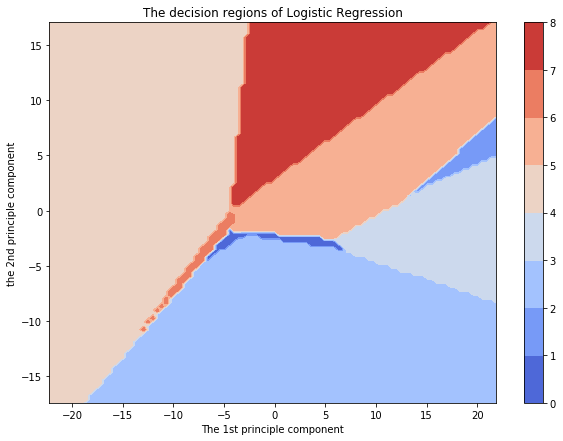

In [7]:
from sklearn.decomposition import PCA

def iaml01cw2_q2_3():
    
    #train  logistic regression model
    lr=LogisticRegression().fit(Xtrn_nm,Ytrn)
    
    # train pca
    pca_fit = PCA(n_components=2).fit_transform(Xtrn_nm)
    
    #     get parameters
    sigma1 = np.std(pca_fit[:,0],ddof=1)
    sigma2 = np.std(pca_fit[:,1],ddof=1)
    
    x_min,x_max = -5 * sigma1, 5*sigma1
    y_min,y_max = -5 * sigma2, 5*sigma2
    
    xx,yy = np.meshgrid(np.arange(x_min,x_max,(x_max-x_min)/100),
                        np.arange(y_min,y_max,(y_max-y_min)/100))
    
    Z=np.c_[xx.ravel(),yy.ravel()]
    V=np.c_[pca_fit.components_[0].ravel(),pca_fit.components_[1].ravel()].T
#     colorbar.set_ticks(np.linspace(-1,9,9))
    X = np.dot(Z,V)
    y_pred = lr.predict(X)
    y_pred = y_pred.reshape(xx.shape)
                        
    #     plot
                        
    fig=plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, y_pred, cmap = plt.cm.coolwarm)
    plt.colorbar()
    plt.title('The decision regions of Logistic Regression')
    plt.xlabel('The 1st principle component')
    plt.ylabel('the 2nd principle component')
    fig.savefig('./results/q2_3.img.png')

iaml01cw2_q2_3()

report your findings<br>

<br>
<b>2.4 (4 points)</b></br>
Using the same method as the one above, plot the decision regions for the SVM classifier you trained in Question 2.2. Comparing the result with that you obtained in Question 2.3, discuss your findings briefly.

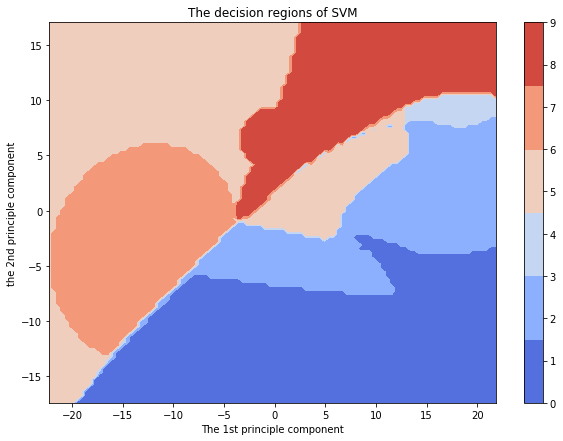

In [39]:
def iaml01cw2_q2_4():
        #train  logistic regression model
    svc_rbf = SVC()
    svc_rbf.fit(Xtrn_nm, Ytrn) 
    
    # train pca
    pca = PCA(n_components=2)
    pca_fit = pca.fit_transform(Xtrn_nm)
    
    #     get parameters
    sigma1 = np.std(pca_fit[:,0],ddof=1)
    sigma2 = np.std(pca_fit[:,1],ddof=1)
    
    x_min,x_max = -5 * sigma1, 5*sigma1
    y_min,y_max = -5 * sigma2, 5*sigma2
    
    xx,yy = np.meshgrid(np.arange(x_min,x_max,(x_max-x_min)/100),
                        np.arange(y_min,y_max,(y_max-y_min)/100))
    
    Z=np.c_[xx.ravel(),yy.ravel()]
    V=np.c_[pca.components_[0].ravel(),pca.components_[1].ravel()].T
    X = np.dot(Z,V)
    y_pred = svc_rbf.predict(X)
    y_pred = y_pred.reshape(xx.shape)
                        
    #     plot
                        
    fig=plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, y_pred, cmap = plt.cm.coolwarm)
    plt.colorbar().set_ticks(np.linspace(-1,9,11))
    plt.title('The decision regions of SVM')
    plt.xlabel('The 1st principle component')
    plt.ylabel('the 2nd principle component')
    
    fig.savefig('./results/q2_4.img.png')

iaml01cw2_q2_4()

<br>report your findings

<br>
<b>2.5 (6 points)</b> <br>
We used default parameters for the SVM in Question 2.2. We now want to tune the parameters by using cross-validation. To reduce the time for experiments, you pick up the first 1000 training samples from each class to create Xsmall, so that Xsmall contains 10,000 samples in total. Accordingly, you create labels, Ysmall.
By using a 3-fold cross validation and Xsmall only, estimate the classification accuracy of an SVM classifier with RBF kernel, while you vary the penalty parameter C in the range 10−2 to 103 (use 10 values spaced equally log space). Set the kernel coefficient parameter gamma to auto for this question.
Plot the mean cross-validated classification accuracy against the regularisation parameter C by using a log-scale for the x-axis. Report the highest obtained mean accuracy score and the value of C which yielded it.

In [8]:
# create Xsmall and Ysmall
import pandas as pd
import math
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

trn_final = np.column_stack((Xtrn_nm,Ytrn))
df_trn = pd.DataFrame(trn_final)

xsmall=[]
ysmall=[]
for i in range(0,10):
    xsmall.append(df_trn[df_trn[df_trn.columns[-1]]==i][:1000].drop([784],axis=1).values)
    ysmall.append(df_trn[df_trn[df_trn.columns[-1]]==i][784][:1000])

    
# 3-fold cross validation
x_svc = np.array(xsmall).reshape(10000,784)
y_svc = np.array(ysmall).reshape(10000,1)


In [16]:
scores_0.mean()

0.6506000000000001

In [9]:
# SVM classifier
C=np.logspace(-2,3,num=10)
accuracy=[]
for i in C:
    accuracy.append(cross_val_score(SVC(C=i,kernel='rbf',gamma='auto'),
                                x_svc,y_svc.ravel(),cv=3,scoring='accuracy').mean())

In [13]:
index_max = max(range(len(accuracy)), key=accuracy.__getitem__)
index_max

6

In [ ]:
maxAccuracy = cross_val_score(SVC(C=C[index_max],kernel='rbf',gamma='auto'),
                                x_svc,y_svc.ravel(),cv=3,scoring='accuracy')

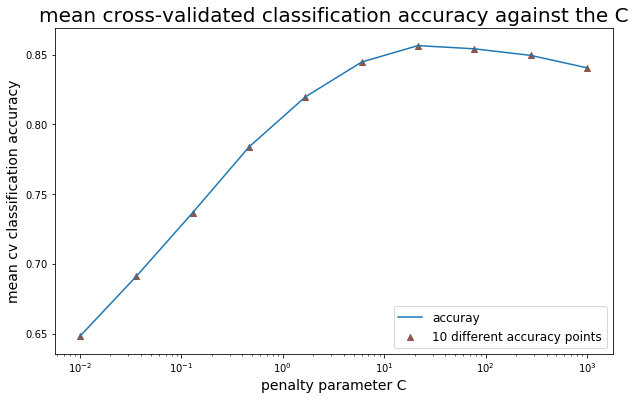

In [79]:
# plot drawing
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(C,accuracy,label='accuray')
ax.scatter(x=C,y=accuracy,
           c='#8c564b',
           alpha=1,
           marker='^',
           label='10 different accuracy points')
ax.set_xscale('log')
ax.set_xlabel('penalty parameter C',fontsize=14)
ax.set_ylabel('mean cv classification accuracy',fontsize=14)
ax.set_title('mean cross-validated classification accuracy against the C',
             fontsize=20)
ax.legend(loc='lower right',fontsize=12)
plt.show()

<b>2.6</b><br>
Report the classification accuracy on the training set and test se

In [14]:
C_test=np.logspace(-2,3,num=10)
svc_best = SVC(C=C[index_max])
svc_best.fit(Xtrn_nm, Ytrn) 
train_score = svc_best.score(Xtrn_nm,Ytrn)
test_score=svc_best.score(Xtst_nm,Ytst)

In [15]:
print('traning score is:{:.3f}'.format(train_score))
print('testing sample score is:{:.3f}'.format(test_score))

traning score is:0.908
testing sample score is:0.876
